## Central Limit Theorem

The Central Limit Theorem (CLT) is a fundamental concept in statistics that states that, given a sufficiently large sample size, the sampling distribution of the sample mean will be approximately normally distributed, regardless of the original population's distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats 

# Set the random seed for reproducibility
np.random.seed(42)

In [2]:
# Generate two different normal distributions

data1 = np.random.normal(loc=5, scale=1, size=500)  
data2 = np.random.normal(loc=10, scale=1, size=500)

# Combine the two datasets
bimodal_data = np.concatenate([data1, data2])

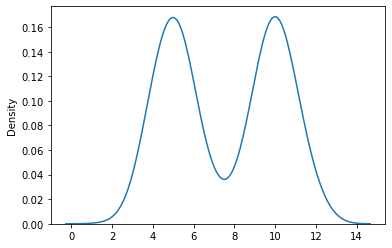

In [5]:
sns.kdeplot(bimodal_data);

# Sampling

In [6]:
# sample mean 
sample_30= np.random.choice(bimodal_data, 100)
sample_30.mean()


7.480128119024034

## Creating a Sampling Distribution of Sample Means

In [8]:
# calculate sample_means
sample_means=[]
for i in range(100):
    sample_30 = np.random.choice(bimodal_data,30)
    sample_means.append(sample_30.mean())

sample_means




[7.405183573888525,
 8.176873077806587,
 7.863308033333277,
 7.8910096645013805,
 7.193531015478992,
 7.276723965943463,
 7.952923274708376,
 7.724575586813409,
 6.92137246236285,
 7.106212715174196,
 7.313226674510859,
 7.1037011988317955,
 7.024760120481845,
 7.139915148696322,
 7.33301501697282,
 7.022385249357474,
 8.026471345272887,
 8.154893748494755,
 7.548263289557463,
 7.478814037006148,
 7.415543815083818,
 7.784734291932368,
 7.553308974691195,
 6.8267288861591355,
 6.987851379713741,
 7.756776567185375,
 7.611554535674347,
 8.044153505524003,
 7.015300899061064,
 8.03267846286369,
 7.876349658914102,
 7.740493840083322,
 8.19046193324905,
 7.712998647187127,
 7.952886423683789,
 7.32771267149198,
 8.551282008265728,
 7.998588812060067,
 6.780999284639088,
 7.998889171712696,
 6.928546919474371,
 7.956699705128281,
 6.992399606644058,
 6.323638959527926,
 7.580739206480823,
 6.912450028499566,
 6.943966386950282,
 7.888014196209068,
 7.9254735878890425,
 7.12010586443574,
 7

## Plotting

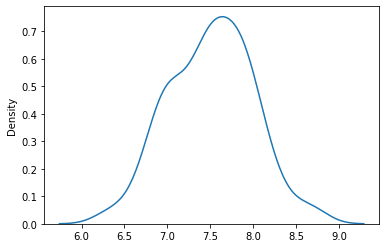

In [11]:
sns.kdeplot(data = sample_means);

Another handy feature of the Central Limit Theorem is that the mean and standard deviation of the sampling distribution should also approximate the population mean and standard deviation from the original non-normal dataset!

## The standard error (SE)

The standard error (SE) is a measure of the variability or dispersion of a sample mean estimate relative to the true population mean. It quantifies how much the sample mean is expected to fluctuate from the true population mean due to sampling variability.

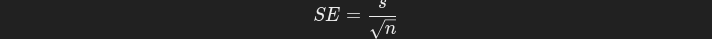

Formula for Standard Error

The standard error of the sample mean is calculated using the formula:

Where:

    s = standard deviation of the sample
    n = number of observations in the sample

In [14]:
# e.g with a population size of 50
sample_50 =  np.random.choice(bimodal_data,40)

sample_50.mean()

7.642191349096612

In [15]:
# population mean

bimodal_data.mean()


7.519332055822325

In [17]:
# stardard error 

SE = sample_50.std()/np.sqrt(len(sample_50))
SE

0.3991487064731894

# Confidence Interval
## What is a Confidence Interval

A Confidence Interval is a range of values above and below the point estimate that captures the true population parameter at some predetermined confidence level. If we want to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, we would set the confidence level to 95%. Higher confidence levels result in wider confidence intervals.

Steps to Calculate Confidence Intervals

    Determine Your Sample Statistics:
        Sample Mean (xˉ): Calculate the mean of your sample data.
        Population Standard Deviation (σ): This is given as known.

    Choose a Confidence Level:
        Common confidence levels are 90%, 95%, and 99%. Each confidence level corresponds to a z-score from the standard normal distribution (Z-distribution).

    Find the Z-Score:
        Use a z-table or standard normal distribution calculator to find the z-score that corresponds to your chosen confidence level.

    Calculate the Standard Error (SE):
    SE=σ/√n

​σ​

Where:

    σ = population standard deviation
    n = sample size

Calculate the Confidence Interval: Using the formula:

    CI=xˉ±z∗⋅SE

We calculate a confidence interval by taking a point estimate and then adding and subtracting a margin of error to create a range. The margin of error is based on your desired confidence level, the spread of the data and the size of your sample. The way you calculate the margin of error depends on whether you know the standard deviation of the population or not.

The margin of error for a known population standard deviation is:

    Margin of Error = z ∗ σ / √n

Where σ (sigma) is the population standard deviation, n is sample size, and z is a number known as the z-critical value.

In [18]:
#calculate the sample mean
sample_mean= sample_50.mean()
sample_mean


7.642191349096612

In [19]:
# find the critical z value

Z= stats.norm.ppf(0.95)
Z



1.6448536269514722

In [20]:
# get the stardard error 

std_err = bimodal_data.std()/np.sqrt(len(sample_50))
std_err

0.4263324787035321

In [21]:
# calculate the margin of error
ME = Z * std_err
ME


0.701254523882716

In [22]:
# calculate the confidence interval

ci = (sample_50.mean()-ME,  sample_50.mean()+ME)
ci


(6.940936825213895, 8.343445872979327)

In [24]:
# check the population mean

bimodal_data.mean()


7.519332055822325

# With Libraries

In [26]:
stats.norm.interval(alpha = 0.95,                         # Confidence level
                 loc = sample_50.mean(),                       # Sample mean
                 scale = SE)                                   # stardard error

(6.859874259933411, 8.424508438259812)

Confidence intervals make a statement of probability about the confidence interval range that could contain the true value.

## Confidence Intervals for a T Distribution 


The t-distribution, also known as Student's t-distribution, is a probability distribution that is used in statistics, particularly when dealing with small sample sizes or when the population standard deviation is unknown.

Calculate a Confidence Interval for the Mean:

    Determine the Point Estimate: Calculate the sample mean (xˉ).

    Select the Confidence Level: Decide on your desired confidence level (commonly 95%).

    Find the Critical Value:
        For a normal distribution, use the z-score for the desired confidence level.
        For smaller samples or unknown population standard deviation, use the t-score.

    Calculate the Standard Error (SE):
    SE= s / √n


where s is the sample standard deviation and n is the sample size.

    Calculate the Margin of Error (ME):
    ME=Critical Value×SE

Construct the Confidence Interval:

    Confidence Interval=(xˉ−ME,xˉ+ME)

In [27]:
#calculate the sample mean

sample_mean = sample_50.mean()

sample_mean

7.642191349096612

In [28]:
# get the t value

t_value = stats.t.ppf(0.95, (len(sample_50)-1))

t_value

1.6848751194973992

The difference in how degrees of freedom are calculated for the t-distribution and the Z-distribution is rooted in the assumptions and characteristics of each distribution.

### Degrees of Freedom in the t-Distribution

1. **Sample Variance**: When estimating the population variance from a sample, you use the sample mean. This introduces an element of dependency because the sample mean is influenced by the data points in your sample.

2. **Loss of Freedom**: Because you use the sample mean to calculate the variance, you lose one degree of freedom. This is why, for a sample size \( n \), the degrees of freedom for the t-distribution is \( n - 1 \).

### Degrees of Freedom in the Z-Distribution

1. **Population Parameters Known**: The Z-distribution is used when you know the population parameters (mean and standard deviation). Therefore, you're not estimating them from the sample; you're using known values.

2. **No Adjustment Needed**: Since you aren’t estimating the population standard deviation from the sample, there’s no need to subtract 1. The Z-distribution assumes that you have a sufficiently large sample size (typically \( n \geq 30 \)), which allows the sample mean to approximate the population mean closely.

### Summary

- **t-Distribution**: Degrees of freedom are \( n - 1 \) because you estimate the sample mean, which affects the calculation of sample variance.

- **Z-Distribution**: Degrees of freedom are not adjusted because it assumes known population parameters, and is typically used for larger sample sizes where the sample mean is a good estimate of the population mean.

This distinction ensures that the t-distribution accounts for increased uncertainty in smaller samples, while the Z-distribution relies on more stable estimates from larger samples or known population values.

In [29]:
# get the SE

se = sample_50.std()/np.sqrt(len(sample_50))

se


0.3991487064731894

In [34]:
ME= t_value*se
ME

0.6725157245162473

In [35]:
# calculate the confidence intervals

ci = (sample_50.mean()-ME), (sample_50.mean()+ME)
ci



(6.969675624580364, 8.314707073612858)

In [36]:
# check the population mean

bimodal_data.mean()



7.519332055822325

# Calculating Confidence intervals using libraries

In [38]:
stats.t.interval(alpha = 0.95,                         # Confidence level
                 df= len(sample_50)-1,                      # Degrees of freedom
                 loc = sample_50.mean(),                    # Sample mean
                 scale = SE)                                # Estimated standard error of the mean


(6.834836888082619, 8.449545810110605)